In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import model_selection, naive_bayes, svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import itertools
# import catboost
# from catboost import CatBoostClassifier
# import rb

import pickle

In [2]:
np.random.seed(5000)

In [3]:
Corpus = pd.read_csv(r"data/student_evaluation.csv",encoding='latin-1')
# Corpus.head()
Corpus.Sentiment.unique()

array(['positive', 'neutral'], dtype=object)

In [4]:
test = pd.read_csv(r"data/course1.csv",encoding='latin-1')
test.head()
# Corpus.Sentiment.unique()

,comment,Predicted_Sentiment,Actual_Sentiment
0,good,NaN,1
1,The course was up to date,NaN,1
2,It is one of the fundamental subjects for Comp...,NaN,1
3,"However, I believe the content of the course w...",NaN,0
4,An excellent course to learn almost every part...,NaN,1


In [5]:
# Step - a : Remove blank rows if any.
test['comment'].dropna(inplace=True)

# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
test['comment'] = [entry.lower() for entry in test['comment']]

# Step - c : Tokenization : In this each entry in the test will be broken into set of words
test['comment']= [word_tokenize(entry) for entry in test['comment']]

# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(test['comment']):
    # Declaring Empty List to store the words that follow the rules for this step
    final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    test.loc[index,'test_final'] = str(final_words)

# print(Final_words)

In [6]:
# Step - a : Remove blank rows if any.
Corpus['comment'].dropna(inplace=True)

# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
Corpus['comment'] = [entry.lower() for entry in Corpus['comment']]

# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
Corpus['comment']= [word_tokenize(entry) for entry in Corpus['comment']]

# Step - d : Remove Stop words, Non-Numeric and perfom Word Stemming/Lemmenting.
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
for index,entry in enumerate(Corpus['comment']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)

# print(Final_words)

In [7]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['Sentiment'],test_size=0.2)
X_Test= test['test_final']
Corpus['Sentiment'].value_counts()
Y_Test=test["Actual_Sentiment"]
# Corpus['text_final']
# X_Test.shape()
# Train_X.describe()
Y_Test.describe()

count    33.000000
mean      0.575758
std       0.501890
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
Name: Actual_Sentiment, dtype: float64

In [8]:
# Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['suggestion'],test_size=0.2)
# # Train_X
# # Test_Y.describe()
# # type(Test_Y)
# a = Corpus.to_numpy()
# # a = Train_X.to_numpy()
# a.shape
# nos = a[a=='NO']
# CS = a[a == 'CS']
# IS = a[a == 'IS']

# print(nos.shape)
# print(CS.shape)

# print(IS.shape)
# # yes = a[a=='yes']
# # yes.shape
# # Test_Y.unique()

In [9]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
# Test_X.describe

In [10]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(Corpus['text_final'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)
# type(Test_X_Tfidf)
# print(Train_X_Tfidf)
# vectorizer = CountVectorizer(ngram_range=(2,2))
# Tfidf_vect.fit_transform(Corpus['text_final'])

# print(Tfidf_vect.get_feature_names())

# vectorizer = TfidfVectorizer(ngram_range=(2,2)) # You can still specify n-grams here.
# X = vectorizer.fit_transform(arr)

In [11]:
# print(Train_X_Tfidf)

# Naive Bayes

In [12]:

#pipeline model 

text_clf = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,4))), 
                      ('clf', MultinomialNB()) ])
text_clf.fit(Train_X,Train_Y)

predictions_NB = text_clf.predict(Test_X)
print("\n Naive Bayes accuracy score -- > ",accuracy_score(Test_Y, predictions_NB)*100)  



 Naive Bayes accuracy score -- >  75.1937984496124


In [13]:
#make the predictions with trained model and submit the predictions.
# y_pred=model.predict_classes(X_test)

predictions_Test_NB = text_clf.predict(X_Test)

test['Sentiment'] = predictions_Test_NB
submission = test[["comment","Predicted_Sentiment","Actual_Sentiment"]]
submission.to_csv("data/results/MNB_submission.csv", index = False)

In [14]:
# predictions = np.round(np.argmax(pred, axis=1)).astype(int)
# sub['Sentiment'] = predictions
# sub.to_csv("blend.csv", index=False)

In [15]:
# #make the predictions with trained model and submit the predictions.
# # y_pred=model.predict_classes(X_test)
# predictions_Test_NB = text_clf.predict(X_Test)

# sub_file = pd.read_csv('data/test.csv',sep=',')
# sub_file.Sentiment=predictions_Test_NB
# sub_file.to_csv('Submission.csv',index=False)

In [16]:
confusion_matrix_result = confusion_matrix(Test_Y, predictions_NB)
print("Confusion matrix \n",confusion_matrix_result)
print("\n Classification report \n",classification_report(Test_Y, predictions_NB))
print("\n Naive Bayes accuracy score -- > ",accuracy_score(Test_Y, predictions_NB)*100)  

print("\n Naive Bayes precision score -- > ",precision_score(Test_Y, predictions_NB, average = 'weighted')*100)  
#make the predictions with trained model and submit the predictions.
# # y_pred=model.predict_classes(X_test)
# predictions_Test_NB = text_clf.predict(X_Test)

# sub_file = pd.read_csv('data/test.csv',sep=',')
# sub_file.Sentiment=predictions_Test_NB
# sub_file.to_csv('Submission.csv',index=False)

Confusion matrix 
 [[47 15]
 [17 50]]

 Classification report 
              precision    recall  f1-score   support

          0       0.73      0.76      0.75        62
          1       0.77      0.75      0.76        67

avg / total       0.75      0.75      0.75       129


 Naive Bayes accuracy score -- >  75.1937984496124

 Naive Bayes precision score -- >  75.24783840190817


In [28]:
# pipeline shortens the steps 
# https://www.youtube.com/watch?v=0kPRaYSgblM
# https://github.com/codewrestling/TextClassification/blob/master/Text%20Classification.py

text_clf = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,3))), 
                      ('clf', MultinomialNB()) ])
# train the model
text_clf.fit(Train_X,Train_Y)

# Predict the test cases
test_x = ['a student must be stupid not to take this course ']
# test_x = [input()]
predicted = text_clf.predict(test_x)
for x in predicted:
    print(x)
    


0


In [18]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)


# docs = ['Also the project helped us implement real world applications that is further helpful if we plan to do research in this field.']
docs = ['not at all satisfied','Good course.', 'Please include Field trips.','I think an in class mini-project should be considered to be done step by step in during lectures.']

# docs = [input()]
# docs = input()
x_new_tfidf = Tfidf_vect.transform(docs)
predictions = Naive.predict(x_new_tfidf)

for x in predictions:
    print(x)
    
    

0
1
0
0


In [19]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
# predict the labels on validation dataset
from sklearn.metrics import f1_score 
predicted_NB = Naive.predict(Test_X_Tfidf)

confusion_matrix_result = confusion_matrix(Test_Y, predicted_NB)
print("Confusion matrix \n",confusion_matrix_result)
print("\n Classification report \n",classification_report(Test_Y, predicted_NB))
print("\n Naive Bayes accuracy score -- > ",accuracy_score(Test_Y, predicted_NB)*100)  

print("\n Naive Bayes precision score -- > ",precision_score(Test_Y, predicted_NB, average = 'weighted')*100)  

print("\n Naive Bayes recall score -- > ",recall_score(Test_Y, predicted_NB, average = 'weighted')*100)  

print("\n Naive Bayes f1_score -- > ",f1_score(Test_Y, predicted_NB, average = 'weighted')*100)  


Confusion matrix 
 [[44 18]
 [17 50]]

 Classification report 
              precision    recall  f1-score   support

          0       0.72      0.71      0.72        62
          1       0.74      0.75      0.74        67

avg / total       0.73      0.73      0.73       129


 Naive Bayes accuracy score -- >  72.86821705426357

 Naive Bayes precision score -- >  72.85737779671533

 Naive Bayes recall score -- >  72.86821705426357

 Naive Bayes f1_score -- >  72.85841333865535


In [21]:
# #make the predictions with trained model and submit the predictions.
# y_pred=model.predict_classes(X_test)

# sub_file = pd.read_csv('../input/sampleSubmission.csv',sep=',')
# sub_file.Sentiment=y_pred
# sub_file.to_csv('Submission.csv',index=False)

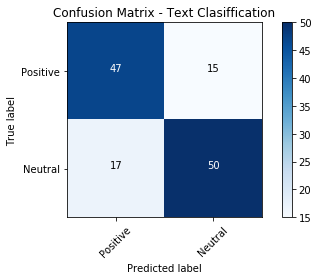

In [22]:
confusion_matrix_NB = confusion_matrix(Test_Y, predictions_NB)

classes = ["Positive","Neutral"]

plt.figure()
plt.imshow(confusion_matrix_NB, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Text Clasiffication")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

text_format = 'd'
thresh = confusion_matrix_NB.max() / 2.
for row, column in itertools.product(range(confusion_matrix_NB.shape[0]), range(confusion_matrix_NB.shape[1])):
    plt.text(column, row, format(confusion_matrix_NB[row, column], text_format),
             horizontalalignment="center",
             color="white" if confusion_matrix_NB[row, column] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

plt.show()

In [23]:
len(Train_Y)
len(Test_Y)


129

## Bernoulli Naive Bayes

In [24]:

# fit the training dataset on the NB classifier
BNaive = naive_bayes.BernoulliNB()
BNaive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
Bpredictions_NB = BNaive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(Bpredictions_NB, Test_Y)*100)
print("Naive Bayes precision Score -> ",precision_score(Bpredictions_NB, Test_Y, average = 'weighted')*100)



Naive Bayes Accuracy Score ->  74.4186046511628
Naive Bayes precision Score ->  77.35777227889062


In [25]:
#pipeline model 

text_clf_BNB = Pipeline([('vect', TfidfVectorizer(ngram_range=(1,1))), 
                      ('clf', BernoulliNB()) ])
text_clf_BNB.fit(Train_X,Train_Y)

Bepredictions_NB = text_clf_BNB.predict(Test_X)
print("Naive Bayes Accuracy Score -> ",accuracy_score(Bepredictions_NB, Test_Y)*100)

print("Naive Bayes precision Score -> ",precision_score(Bepredictions_NB, Test_Y, average = 'weighted')*100)


Naive Bayes Accuracy Score ->  75.96899224806202
Naive Bayes precision Score ->  78.19118958844187


In [26]:
confusion_matrix_result = confusion_matrix(Test_Y, Bepredictions_NB)
print("Confusion matrix \n",confusion_matrix_result)
print("\n Classification report \n",classification_report(Test_Y, Bepredictions_NB))
print("\n Naive Bayes accuracy score -- > ",accuracy_score(Test_Y, Bepredictions_NB)*100)  

print("\n Naive Bayes precision score -- > ",precision_score(Test_Y, Bepredictions_NB, average = 'weighted')*100)  


Confusion matrix 
 [[40 22]
 [ 9 58]]

 Classification report 
              precision    recall  f1-score   support

          0       0.82      0.65      0.72        62
          1       0.72      0.87      0.79        67

avg / total       0.77      0.76      0.76       129


 Naive Bayes accuracy score -- >  75.96899224806202

 Naive Bayes precision score -- >  76.88933713020091


In [27]:
#make the predictions with trained model and submit the predictions.
# y_pred=model.predict_classes(X_test)

# predictions_Test_NB = text_clf.predict(X_Test)

Bepredictions_NB = text_clf_BNB.predict(X_Test)

confusion_matrix_result = confusion_matrix(Y_Test, Bepredictions_NB)
print("Confusion matrix \n",confusion_matrix_result)
print("\n Classification report \n",classification_report(Y_Test, Bepredictions_NB))
print("\n Naive Bayes accuracy score -- > ",accuracy_score(Y_Test, Bepredictions_NB)*100)  

print("\n Naive Bayes precision score -- > ",precision_score(Y_Test, Bepredictions_NB, average = 'weighted')*100)  


test['Sentiment'] = Bepredictions_NB
submission = test[["comment","Predicted_Sentiment","Actual_Sentiment"]]
submission.to_csv("data/results/BNB_submission.csv", index = False)

Confusion matrix 
 [[12  2]
 [ 4 15]]

 Classification report 
              precision    recall  f1-score   support

          0       0.75      0.86      0.80        14
          1       0.88      0.79      0.83        19

avg / total       0.83      0.82      0.82        33


 Naive Bayes accuracy score -- >  81.81818181818183

 Naive Bayes precision score -- >  82.62032085561498
